In [1]:
from gym.wrappers import FrameStack, RescaleAction, TimeLimit
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import TD3
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

from environments import ARESEASequential, ResetActuators

In [6]:
def make_env():
    env = ARESEASequential(
        backend="simulation",
        backendargs={"measure_beam": "direct"}
    )
    env = FrameStack(env, 16)
    env = ResetActuators(env)
    env = TimeLimit(env, max_episode_steps=50)
    env = RescaleAction(env, -1, 1)
    env = Monitor(env, info_keywords=("mae",))
    return env

In [7]:
log_path = "log/major-energy-117"
steps = 1041000
# log/major-energy-117/vec_normalize_1041000_steps.pkl

env = DummyVecEnv([make_env])
env = VecNormalize.load(f"{log_path}/vec_normalize_{steps}_steps.pkl", env)

model = TD3.load(f"{log_path}/rl_model_{steps}_steps")

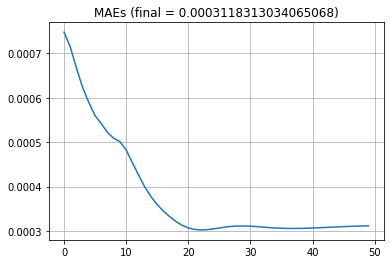

In [8]:
maes = []
done = False
observation = env.reset()
while not done:
    action, _  = model.predict(observation)
    observation, _, done, info = env.step(action)
    
    maes.append(info[0]["mae"])

plt.title(f"MAEs (final = {maes[-1]})")
plt.plot(maes)
# plt.xscale("log")
plt.grid()
plt.show()